<a href="https://colab.research.google.com/github/DavideColnago97/Lesson-Data-Analysis-with-Python-/blob/master/Esercitazione_Missing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(
    '/content/drive/MyDrive/Lezioni Python/FreeCodeCamp-Pandas-Real-Life-Example-master/Missing Data Lesson/data/btc-eth-prices-outliers.csv',
    index_col=0, parse_dates=True)


In [ ]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


And now we can run a simple visualization:

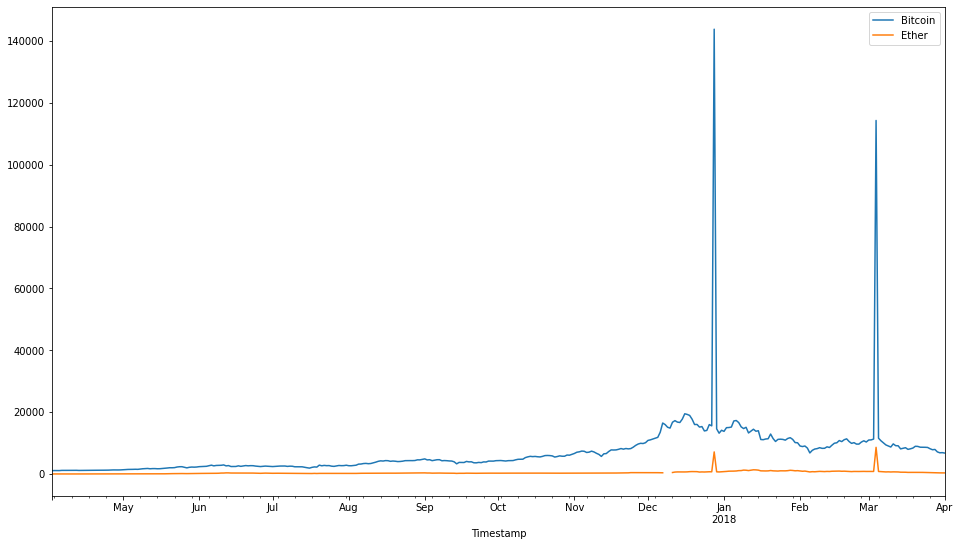

In [ ]:
df.plot(figsize=(16,9))

There are clearly some invalid values, both ETH and BTC have huge spikes. On top of that, there seems to be some data missing in Ether between December 2017 and and January 2018:

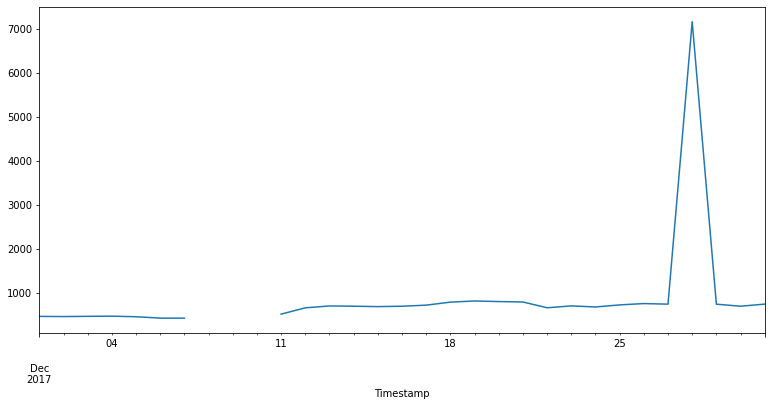

In [ ]:
df.loc['12-01-2017':'12-31-2017','Ether'].plot(figsize=(13,6))

In [ ]:
df_na=df.loc['12-07-2017':'12-12-2017']

Are those null values?

In [ ]:
df_na.isna().values.any()

True

Let's add a little bit more context:

In [ ]:
df.loc['12-01-2017':'12-15-2017']

,Bitcoin,Ether
Timestamp,,
2017-12-01,10883.912000,461.58
2017-12-02,11071.368333,457.96
2017-12-03,11332.622000,462.81
2017-12-04,11584.830000,466.93
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN


We now need to decide what we'll do with the missing values. Drop them? fill them? If we decide to fill them, what will be use as fill value? For example: we can use the previous value and just assume the price stayed the same.


In [ ]:
df['Ether']=df['Ether'].fillna(method='ffill')

In [ ]:
df.loc['12-01-2017':'12-15-2017']

,Bitcoin,Ether
Timestamp,,
2017-12-01,10883.912000,461.58
2017-12-02,11071.368333,457.96
2017-12-03,11332.622000,462.81
2017-12-04,11584.830000,466.93
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,0.00
2017-12-09,15142.834152,0.00


Much better. We now need to fix the huge spikes. The first step is identifying them. How can we do it? The simple answer is of course visually. They seem to be located in the last 10 days of Dec 2017 and first of March 2018:


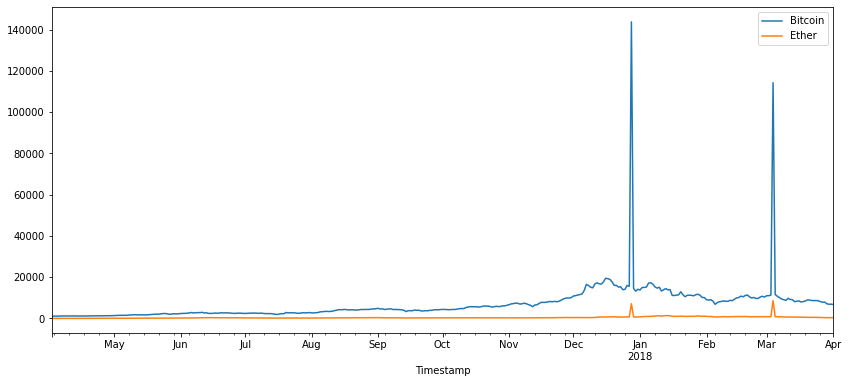

In [ ]:
df.plot(figsize=(14,6))

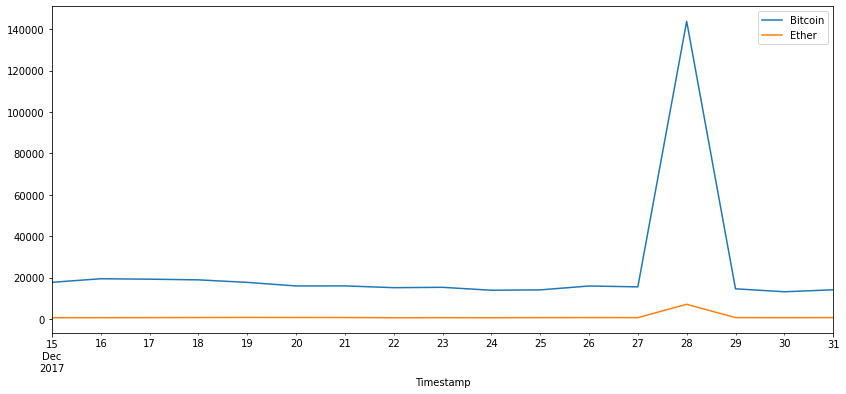

In [ ]:
df.loc['12-15-2017':'12-31-2017'].plot(figsize=(14,6))

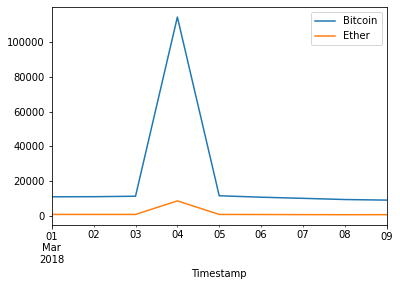

In [ ]:
df['2018-03-01': '2018-03-09'].plot()

Apparently, they're located in '2017-12-28' and '2018-03-04':


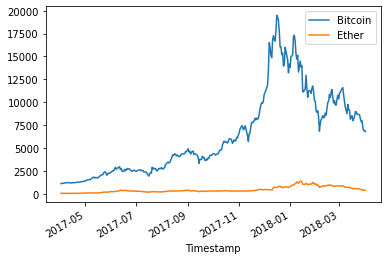

In [ ]:
df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))

df_cleaned.plot()

Now it looks much better. Our data seems to be clean.
Visualizations helps make sense of the data and let us judge if our analysis and work is on the right track. But we need a more powerful method to handle our data. That's what we call "analysis". We'll use _analytical_ methods to identify these outliers or these skewed values.


### Central Tendency
We'll use a set of common indicators of to measure central tendency and identify these outliers:


##### mean
The mean is probably the most common and popular one. The problem is that it's really sensitive to outliers. The mean of our dataset with invalid values is:


In [ ]:
print(df['Bitcoin'].mean())
df['Ether'].mean()

6996.004021822738


468.8517534246575

Both values seem too high. That's because the outliers are skewing with the mean:


In [ ]:
print(df_cleaned['Bitcoin'].mean())
df_cleaned['Ether'].mean()

6323.509186313956


427.86691460055096

##### median


In [ ]:
print(df_cleaned['Bitcoin'].median())
df_cleaned['Ether'].median()

4580.3874799999985


309.32

##### mode

It doesn't make much sense to measure the mode, as we have continuous values. But you can do it just with `df.mode()`.


In [ ]:
print(df_cleaned['Bitcoin'].mode())
df_cleaned.mode()

0       1099.169125
1       1133.079314
2       1141.600363
3       1141.813000
4       1180.023713
           ...     
358    17737.111667
359    17771.900000
360    18961.856667
361    19289.785000
362    19498.683333
Length: 363, dtype: float64


,Bitcoin,Ether
0,1099.169125,421.15
1,1133.079314,NaN
2,1141.600363,NaN
3,1141.813000,NaN
4,1180.023713,NaN
...,...,...
358,17737.111667,NaN
359,17771.900000,NaN
360,18961.856667,NaN
361,19289.785000,NaN


### Visualizing distribution
Now we can use a few of the charts that we saw before + seaborn to visualize the distribution of our values. In particular, we're interested in **histograms**:


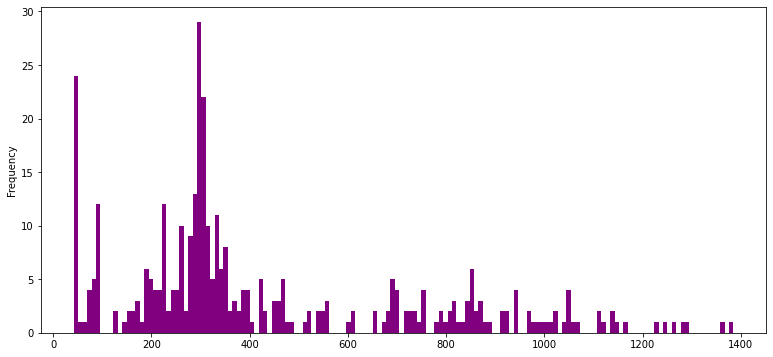

In [ ]:
df_cleaned['Ether'].plot(kind='hist',color='purple',figsize=(13,6),bins=150)

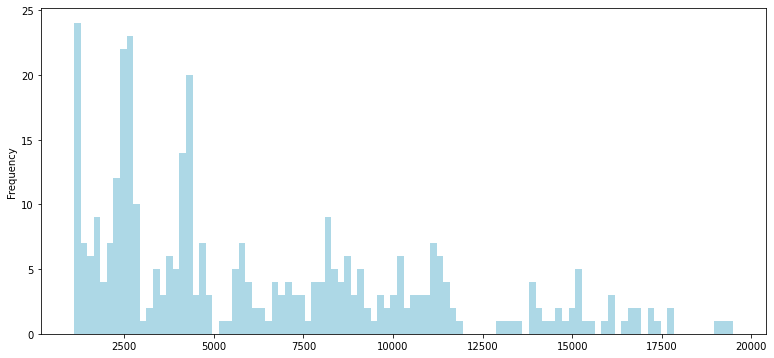

In [ ]:
df_cleaned['Bitcoin'].plot(kind='hist',color='lightblue',bins=100,figsize=(13,6))

Using seaborn:


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


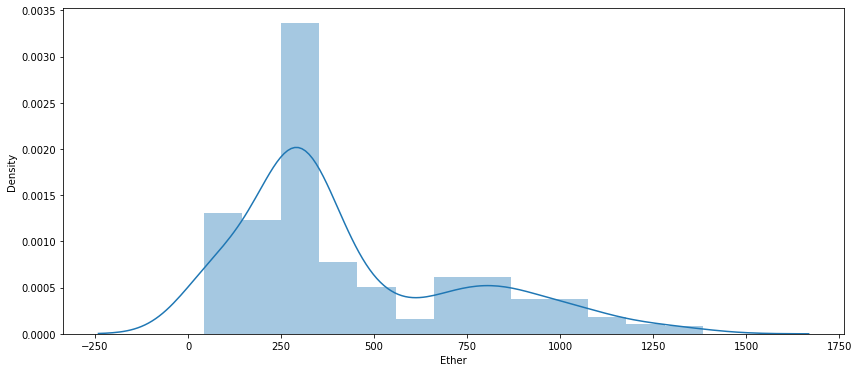

In [ ]:
fig,ax = plt.subplots(figsize=(14,6))
sns.distplot(df_cleaned['Ether'], ax=ax)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


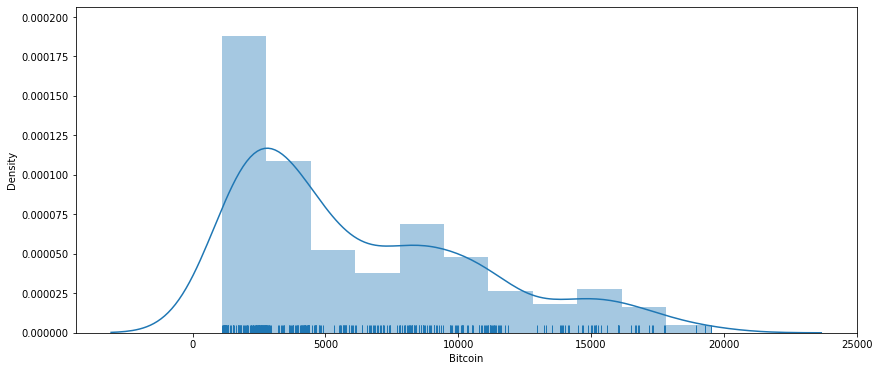

In [ ]:
fig,axis=plt.subplots(figsize=(14,6))
sns.distplot(df_cleaned['Bitcoin'],ax=axis,rug=True)

Seaborn's `distplot` is a general method that will plot a histogram, a KDE and a rugplot. You can also use them as separate:


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


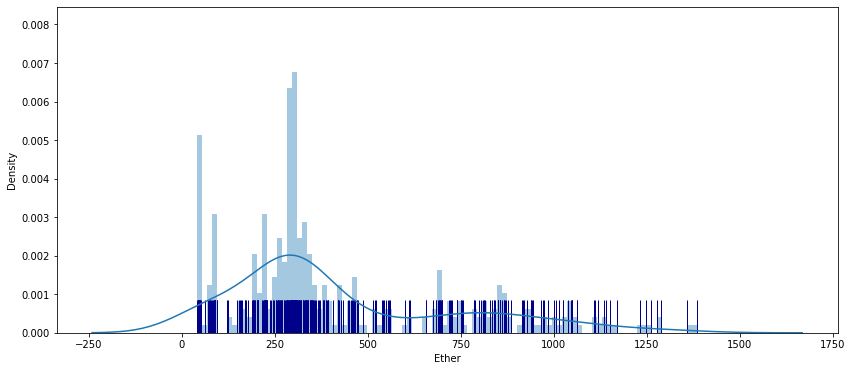

In [ ]:
fig, ax=plt.subplots(figsize=(14,6))
sns.distplot(df_cleaned['Ether'],ax=ax,bins=100)
sns.rugplot(df_cleaned['Ether'],ax=ax,height=0.1,color='darkblue')


We can also visualize a cumulative plot of our distribution:


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


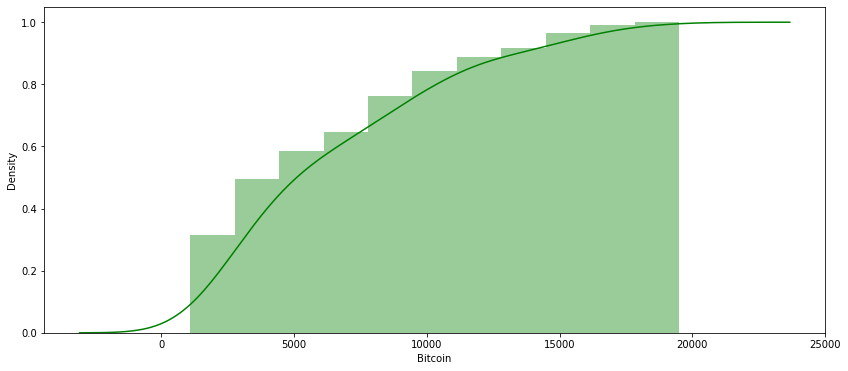

In [ ]:
fig,ax=plt.subplots(figsize=(14,6))
sns.distplot(df_cleaned['Bitcoin'],ax=ax, color='green',hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))

This plot shows how many samples fall behind a certain value. We can increase the number of bins in order to have more detail:


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


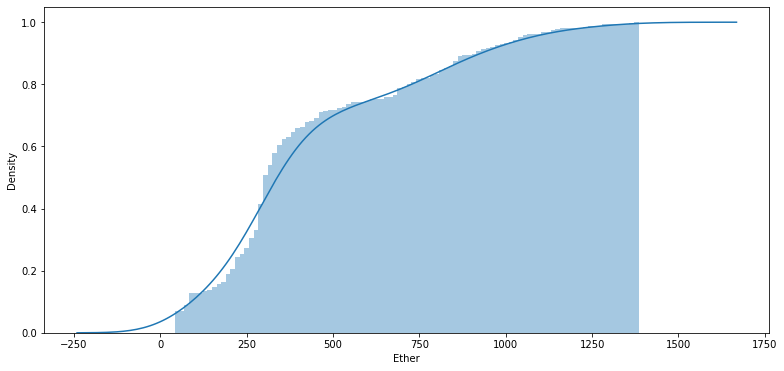

In [ ]:
fig,ax=plt.subplots(figsize=(13,6))
sns.distplot(df_cleaned['Ether'],ax=ax,kde_kws=dict(cumulative=True),hist_kws=dict(cumulative=True),bins=100)

### Visualizing bivariate distributions
The most common way to observe a bivariate distribution is a scatterplot, the `jointplot` will also include the distribution of the variables:


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


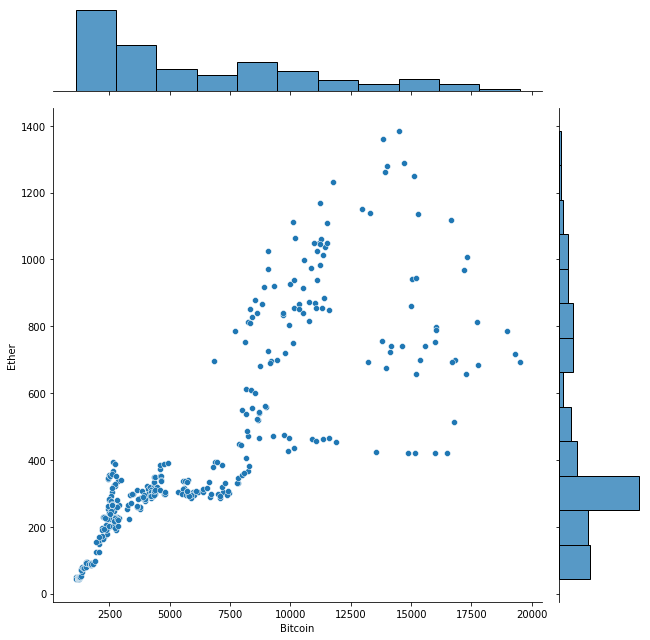

In [ ]:
sns.jointplot(x='Bitcoin',y='Ether',data=df_cleaned,size=9)

If you want only a scatter plot, you can use the `regplot` method, that also fits a linear regression model in the plot:


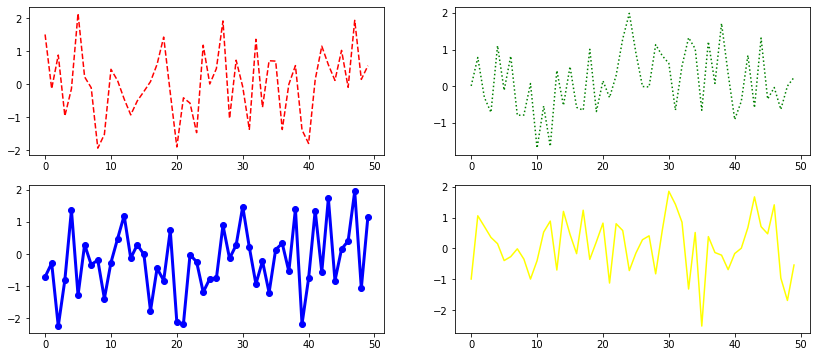

In [ ]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects
ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)


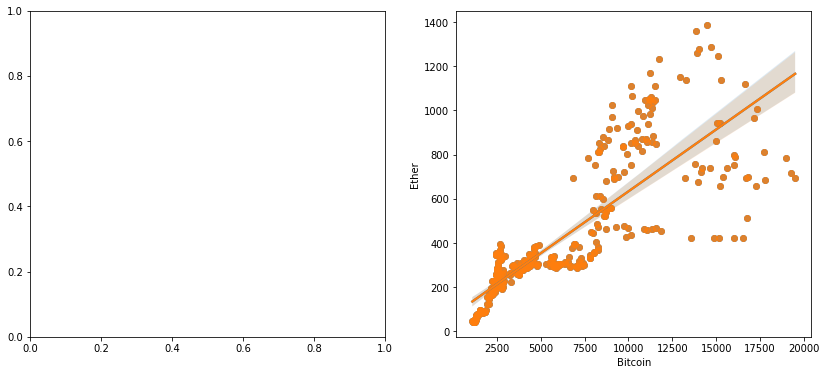

In [ ]:
fig,(ax1,ax2)= plt.subplots(nrows=1,ncols=2,figsize=(14,6))
ax2=sns.regplot(x='Bitcoin',y='Ether',data=df_cleaned,fit_reg=True)
ax1=sns.regplot(x="Bitcoin", y="Ether", data=df_cleaned)

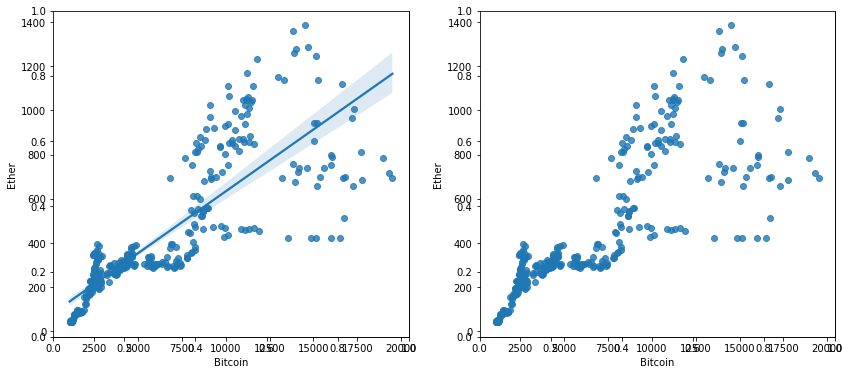

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
sns.regplot(x='Bitcoin',y='Ether',data=df_cleaned)



ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='Bitcoin',y='Ether',data=df_cleaned,fit_reg=False )



### Quantiles, quartiles and percentiles

In [ ]:
print(df_cleaned['Bitcoin'].quantile(0.5))
print(df_cleaned['Bitcoin'].median())

4580.3874799999985
4580.3874799999985


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

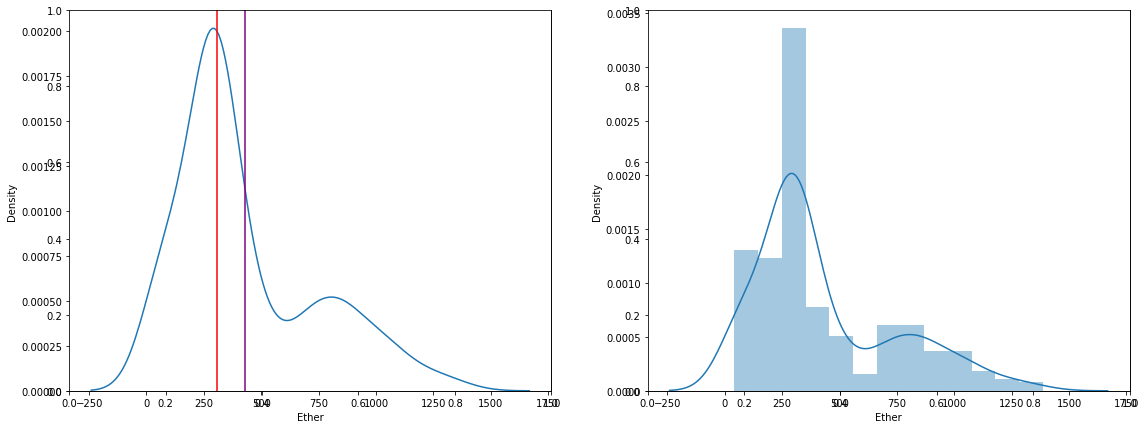

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(19, 7))
ax1 = fig.add_subplot(1,2,1)
sns.kdeplot(df_cleaned['Ether'],ax=ax1)
ax1.axvline(x=df_cleaned['Ether'].quantile(.5),color='r')
ax1.axvline(x=df_cleaned['Ether'].mean(),color='purple')
ax1 = fig.add_subplot(1,2,2)
sns.distplot(df_cleaned['Ether'])
sns

## Dispersion

We'll use a few methods to measure dispersion in our dataset, most of them well known:

* Range
* Variance and Standard Deviation
* IQR

Cella di testo <undefined>
#%% [markdown]
##### Range

Range is fairly simple to understand, it's just the max - min values:


In [ ]:
range_bitcoin=df_cleaned['Bitcoin'].max()-df_cleaned['Bitcoin'].min()
print(range_bitcoin)
range_ether=df_cleaned['Ether'].max()-df_cleaned['Ether'].min()
print(range_ether)

18399.514208333334
1342.71


##### Variance and Standard Deviation


In [ ]:
df_cleaned['Bitcoin'].var()

20374008.23605083

In [ ]:
df_cleaned['Bitcoin'].std()

4513.757662530282

Both variance and std are sensible to outliers as well. We can check with our cleaned dataset:


### Analytical Analysis of invalid values

We can now use the measurements we've seen to analyze those values that seem invalid.

Cella di testo <undefined>
#%% [markdown]
##### Using `std`: Z scores

We can now define those values that are a couple of Z scores above or below the mean (or the max/min value). Example:



In [ ]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2 * df['Bitcoin'].std()


In [ ]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))


Upper Limit: 27369.17635730168
Lower Limit: -13377.168313656206


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


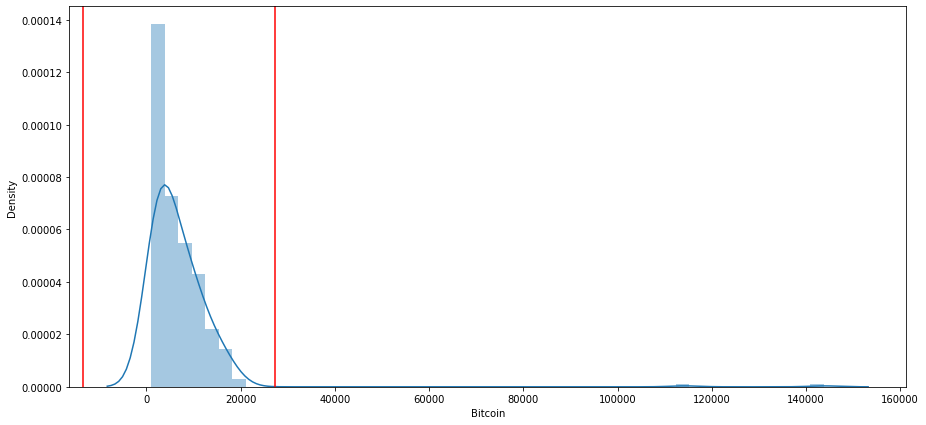

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

##### Using IQRs

We can use the IQR instead of std if we think that the standard deviation might be **too** affected by the outliers/invalid values.


In [ ]:
iqr = df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)


In [ ]:
upper_limit = df['Bitcoin'].mean() + 2 * iqr
lower_limit = df['Bitcoin'].mean() - 2 * iqr


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


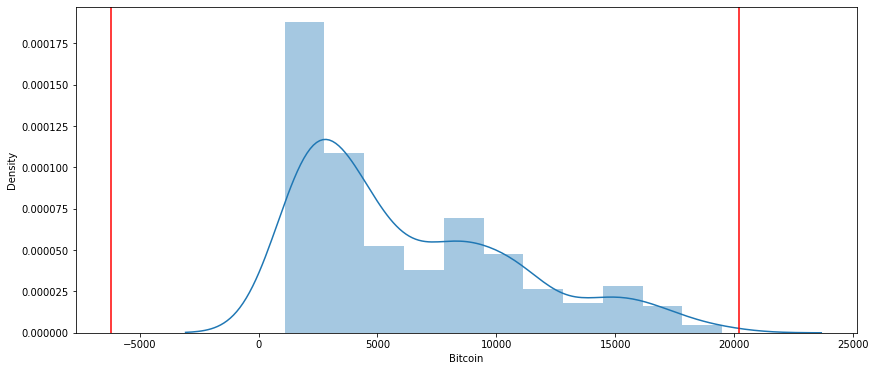

In [ ]:
fig,ax =plt.subplots(figsize=(14,6))
sns.distplot(df_cleaned['Bitcoin'],ax=ax)
ax.axvline(x=upper_limit,color='r')
ax.axvline(x=lower_limit,color='r')

### Cleaning invalid values analytically

It's time now to remove these invalid values analytically, we'll use the upper limit defined by standard deviation:


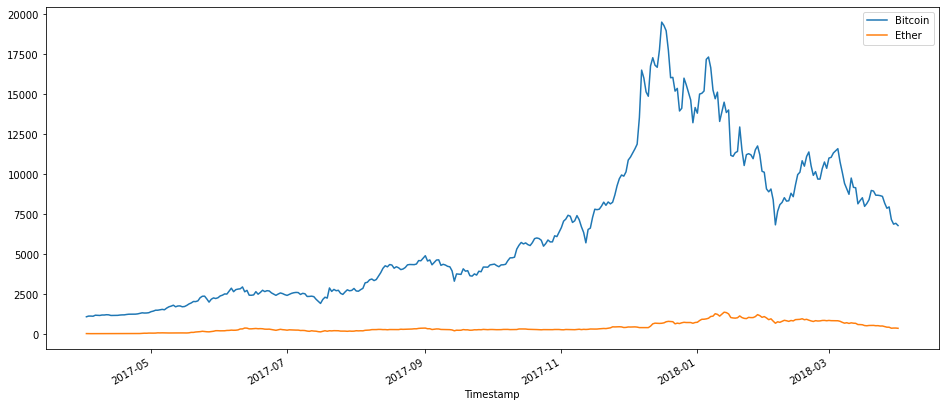

In [ ]:
df[df['Bitcoin'] < upper_limit].plot(figsize=(16, 7))


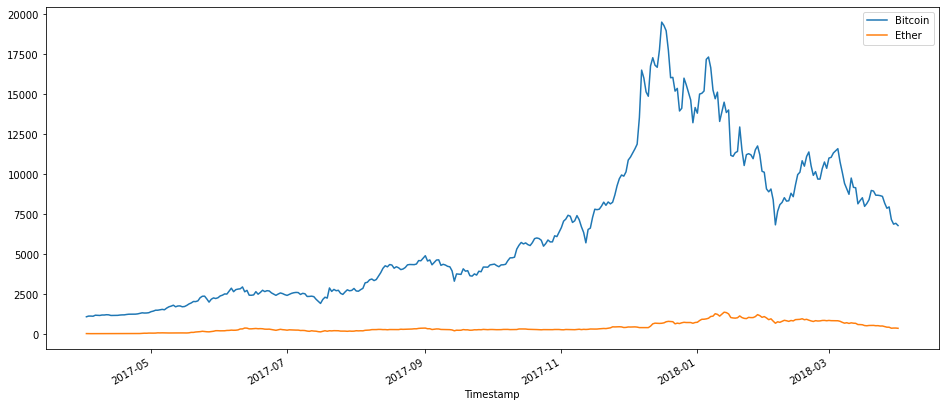

In [ ]:
df.drop(df[df['Bitcoin'] > upper_limit].index).plot(figsize=(16, 7))
